In [41]:
#import needed libraries
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [23]:
# import dataset
df = pd.read_csv("Monthly Exchange Rates 6.csv")

In [24]:
#display first 5 rows of the dataset
df.head()

,Year,Variables,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2023,Inter-Bank Exchange Rate - Month Average (GHC/...,9.9094,10.8636,11.0140,10.9456,10.9152,10.9836,11.0020,11.0066,11.0629,11.3354,11.5494,11.6511
1,2022,Inter-Bank Exchange Rate - Month Average (GHC/...,6.0104,6.3077,7.0465,7.1123,7.1260,7.1908,7.3908,8.0588,8.7472,11.1671,13.0730,10.0347
2,2021,Inter-Bank Exchange Rate - Month Average (GHC/...,5.7608,5.7575,5.7275,5.7308,5.7333,5.7524,5.7848,5.8264,5.8592,5.8817,5.9070,5.9469
3,2020,Inter-Bank Exchange Rate - Month Average (GHC/...,5.5275,5.3194,5.3565,5.5151,5.6109,5.6427,5.6724,5.6815,5.6971,5.7054,5.7120,5.7209
4,2019,Inter-Bank Exchange Rate - Month Average (GHC/...,4.8947,5.0162,5.1797,5.0864,5.1083,5.2402,5.2560,5.2712,5.3067,5.3235,5.3888,5.5377


In [25]:
df.dtypes # show the datatypes of each of the variables 

Year           int64
Variables     object
Jan          float64
Feb          float64
Mar          float64
Apr          float64
May          float64
Jun          float64
Jul          float64
Aug          float64
Sep          float64
Oct          float64
Nov          float64
Dec          float64
dtype: object

In [26]:
df.shape #shows the dimensions of the dataset

(5, 14)

In [27]:
# change wide to long format
df = df.melt(id_vars=['Year', 'Variables'], var_name='Months', value_name='Interest rate')
df.head()

,Year,Variables,Months,Interest rate
0,2023,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,9.9094
1,2022,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,6.0104
2,2021,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,5.7608
3,2020,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,5.5275
4,2019,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,4.8947


In [28]:
# Merge year and month variables to produce one datetime component
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-'+ df['Months'])


In [29]:
df.head()

,Year,Variables,Months,Interest rate,Date
0,2023,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,9.9094,2023-01-01
1,2022,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,6.0104,2022-01-01
2,2021,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,5.7608,2021-01-01
3,2020,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,5.5275,2020-01-01
4,2019,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,4.8947,2019-01-01


In [30]:
# remove unused columns
df = df.drop(['Year','Months','Variables'], axis=1)

In [31]:
# reindex so that datetime column starts the dataframe
df.set_index('Date', inplace=True)
df = df.reindex(pd.date_range(start = '2019-01-01', end='2023-12-01', freq='MS'))

In [32]:
# Data visualization
plot = px.line(df, y='Interest rate', title='Interest rate for 2019-2023')
plot.show()

In [34]:
df.to_csv('Interest rate.csv') # save the preprocessed data

In [68]:
prophet_df = pd.read_csv("Interest rate.csv") #load data for prophet modeling
prophet_df.head()

,Date,Interest rate
0,2019-01-01,4.8947
1,2019-02-01,5.0162
2,2019-03-01,5.1797
3,2019-04-01,5.0864
4,2019-05-01,5.1083


In [69]:
prophet_df.columns = ['ds', 'y'] # change column name to ds and y (must)

In [70]:
prophet_df.head()

,ds,y
0,2019-01-01,4.8947
1,2019-02-01,5.0162
2,2019-03-01,5.1797
3,2019-04-01,5.0864
4,2019-05-01,5.1083


In [71]:
model = Prophet(interval_width=0.95,seasonality_mode='additive', yearly_seasonality=True )
model.fit(prophet_df)

21:04:38 - cmdstanpy - INFO - Chain [1] start processing
21:04:38 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future = model.make_future_dataframe(periods=12, freq="MS")
forecast = model.predict(future)

In [73]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2019-01-01,4.766725
1,2019-02-01,4.898119
2,2019-03-01,5.130821
3,2019-04-01,4.987384
4,2019-05-01,4.902882
...,...,...
67,2024-08-01,14.005381
68,2024-09-01,14.315403
69,2024-10-01,14.877293
70,2024-11-01,15.408823


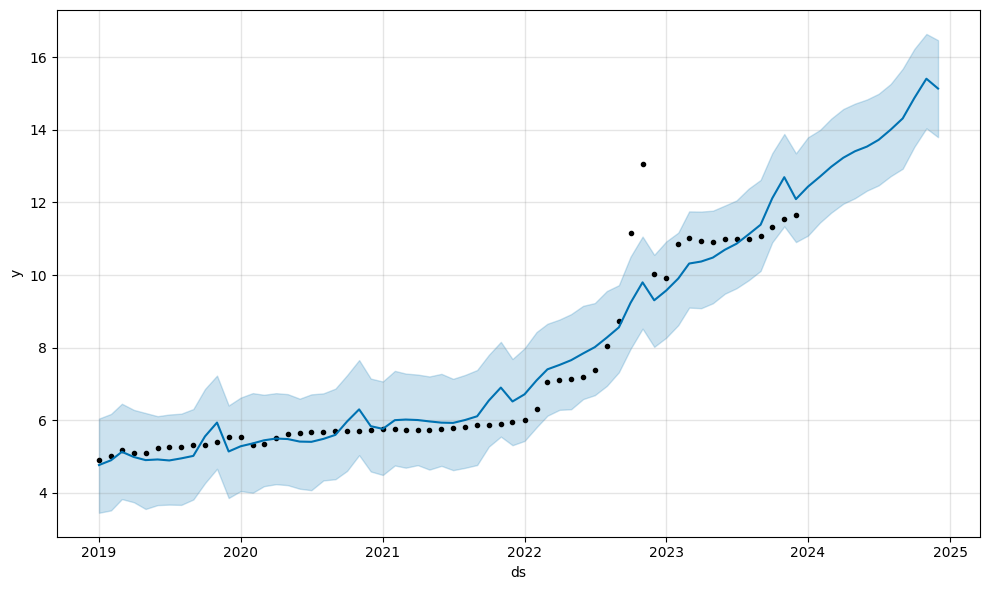

In [74]:
prophet_plot = model.plot(forecast)
# blue line shows prophet prediction 
#black dots are actual values